✅ Data loaded: (210, 32) rows × columns
Columns with no missing data: 30

✅ Standard of Living Index (SoLI) calculated.

📈 LINEAR REGRESSION RESULTS
R² = 1.0000 | RMSE = 0.0000 | MAE = 0.0000


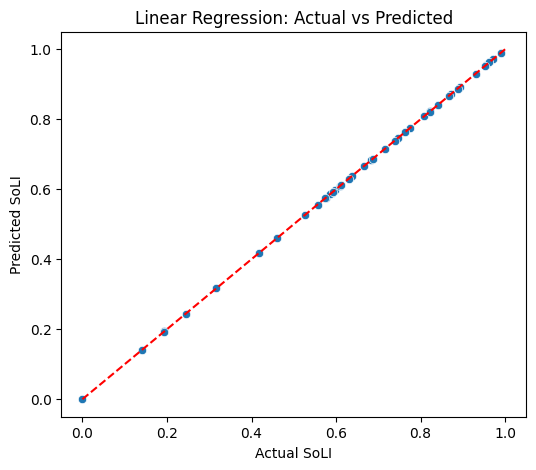


🤖 RANDOM FOREST CLASSIFICATION RESULTS
Accuracy=0.976 | Precision=0.955 | Recall=1.000 | F1=0.977

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.95      1.00      0.98        21

    accuracy                           0.98        42
   macro avg       0.98      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42



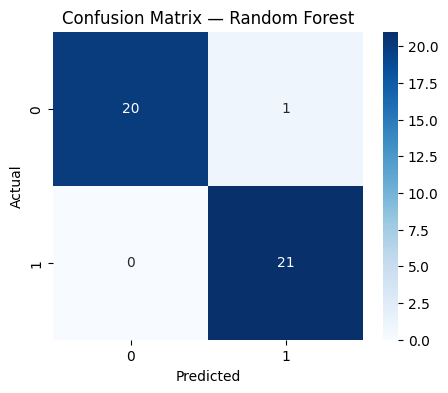

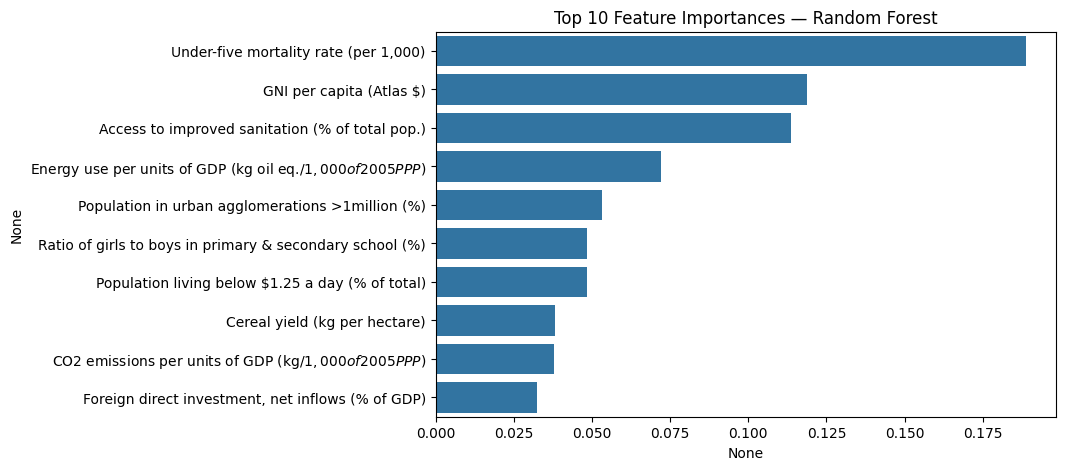

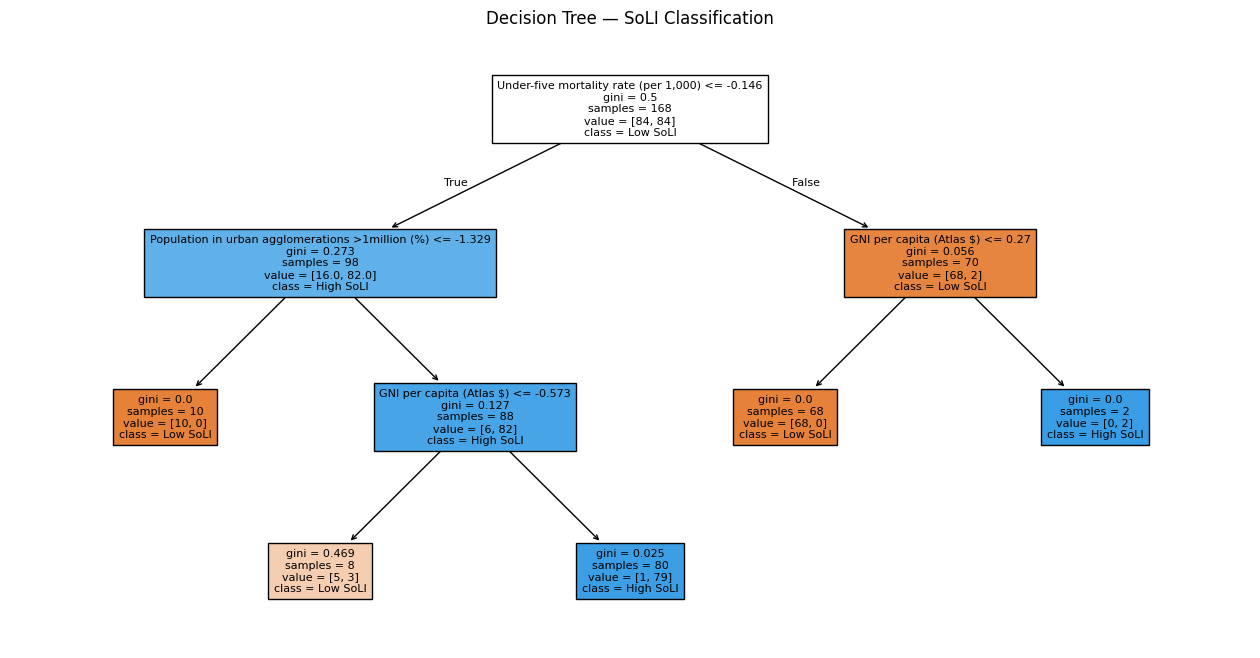


🌀 KMEANS CLUSTERING RESULTS
Best number of clusters = 2 → Silhouette scores: {2: 0.35849240951674993, 3: 0.26238887751834106, 4: 0.2854494846453405, 5: 0.3257125384792977}


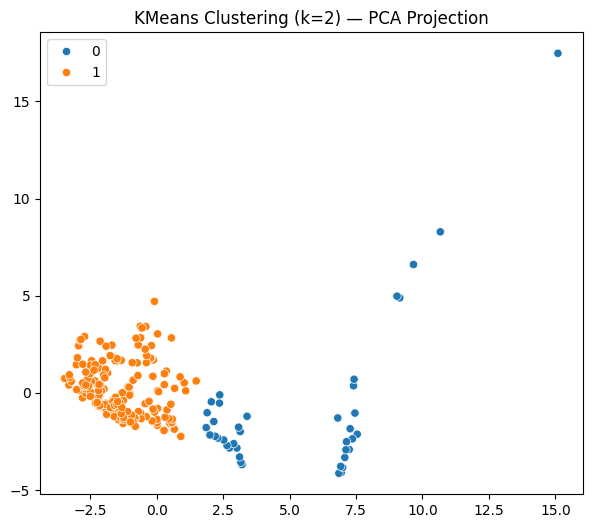


✅ All models trained and visualized successfully.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, silhouette_score
)

# -----------------------------
# 1️⃣ LOAD EXCEL FILE
# -----------------------------
# 👉 Change file name here if needed
df = pd.read_excel("check.xlsx")
print("✅ Data loaded:", df.shape, "rows × columns")

# Keep only columns with no missing values
no_missing_cols = [c for c in df.columns if not df[c].isnull().any()]
df = df[no_missing_cols]
print("Columns with no missing data:", len(no_missing_cols))

# -----------------------------
# 2️⃣ DEFINE INDICATORS
# -----------------------------
positive_indicators = [
    'Access to improved sanitation (% of total pop.)',
    'GDP ($)',
    'GNI per capita (Atlas $)',
    'Physicians (per 1,000 people)',
    'Primary completion rate, total (% of relevant age group)',
    'Ratio of girls to boys in primary & secondary school (%)',
    'Paved roads (% of total roads)',
    'Urban population',
    'Cereal yield (kg per hectare)',
    'Population in urban agglomerations >1million (%)'
]
negative_indicators = [
    'CO2 emissions per capita (metric tons)',
    'Under-five mortality rate (per 1,000)',
    'Population living below $1.25 a day (% of total)',
    'GHG net emissions/removals by LUCF (MtCO2e)'
]

# Keep only indicators that exist in your dataset
pos_present = [c for c in positive_indicators if c in df.columns]
neg_present = [c for c in negative_indicators if c in df.columns]

# -----------------------------
# 3️⃣ COMPUTE STANDARD OF LIVING INDEX (SoLI)
# -----------------------------
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[pos_present + neg_present] = scaler.fit_transform(df[pos_present + neg_present])

df_scaled["SoLI_raw"] = df_scaled[pos_present].mean(axis=1) - df_scaled[neg_present].mean(axis=1)
df_scaled["SoLI"] = (df_scaled["SoLI_raw"] - df_scaled["SoLI_raw"].min()) / (
    df_scaled["SoLI_raw"].max() - df_scaled["SoLI_raw"].min()
)
print("\n✅ Standard of Living Index (SoLI) calculated.")

# -----------------------------
# 4️⃣ PREPARE FEATURES
# -----------------------------
exclude_cols = ["Country name", "Country code", "Year", "SoLI", "SoLI_raw"]
features = [c for c in df_scaled.columns if c not in exclude_cols and pd.api.types.is_numeric_dtype(df_scaled[c])]
X = df_scaled[features]
y_reg = df_scaled["SoLI"]
y_clf = (y_reg > y_reg.median()).astype(int)

# Train/Test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

# Standardize data
scaler_std = StandardScaler()
X_train_r = scaler_std.fit_transform(X_train_r)
X_test_r = scaler_std.transform(X_test_r)
X_train_c = scaler_std.transform(X_train_c)
X_test_c = scaler_std.transform(X_test_c)

# -----------------------------
# 5️⃣ LINEAR REGRESSION
# -----------------------------
# -----------------------------
# 5️⃣ LINEAR REGRESSION
# -----------------------------
lr = LinearRegression()
lr.fit(X_train_r, y_train_r)
y_pred_r = lr.predict(X_test_r)

r2 = r2_score(y_test_r, y_pred_r)
rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))   # ✅ fixed line
mae = mean_absolute_error(y_test_r, y_pred_r)

print("\n📈 LINEAR REGRESSION RESULTS")
print(f"R² = {r2:.4f} | RMSE = {rmse:.4f} | MAE = {mae:.4f}")


plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test_r, y=y_pred_r)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Actual SoLI")
plt.ylabel("Predicted SoLI")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

# -----------------------------
# 6️⃣ CLASSIFICATION (RANDOM FOREST)
# -----------------------------
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train_c, y_train_c)
y_pred_c = clf.predict(X_test_c)

acc = accuracy_score(y_test_c, y_pred_c)
prec = precision_score(y_test_c, y_pred_c)
rec = recall_score(y_test_c, y_pred_c)
f1 = f1_score(y_test_c, y_pred_c)
cm = confusion_matrix(y_test_c, y_pred_c)

print("\n🤖 RANDOM FOREST CLASSIFICATION RESULTS")
print(f"Accuracy={acc:.3f} | Precision={prec:.3f} | Recall={rec:.3f} | F1={f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Feature Importances — Random Forest")
plt.show()

# -----------------------------
# 7️⃣ DECISION TREE VISUALIZATION
# -----------------------------
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train_c, y_train_c)

plt.figure(figsize=(16, 8))
plot_tree(dtree, feature_names=features, class_names=["Low SoLI", "High SoLI"], filled=True, fontsize=8)
plt.title("Decision Tree — SoLI Classification")
plt.show()

# -----------------------------
# 8️⃣ KMEANS CLUSTERING
# -----------------------------
X_scaled = scaler_std.transform(X)
sil_scores = {}
for k in range(2, 6):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil_scores[k] = silhouette_score(X_scaled, labels)

best_k = max(sil_scores, key=sil_scores.get)
print("\n🌀 KMEANS CLUSTERING RESULTS")
print("Best number of clusters =", best_k, "→ Silhouette scores:", sil_scores)

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)
df_scaled["Cluster"] = labels

# 2D PCA plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(7, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="tab10")
plt.title(f"KMeans Clustering (k={best_k}) — PCA Projection")
plt.show()

print("\n✅ All models trained and visualized successfully.")
